In [2]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [3]:
X_data = pd.read_csv('X_data.csv')
X_data = np.array(X_data.values.tolist())
X_data = X_data[:,1:]
print(X_data[0])

Y_data = pd.read_csv('Y_data.csv')
Y_data = np.array(Y_data.values.tolist())
Y_data = Y_data[:,1]
print(Y_data[0])

[8.00e+02 2.80e+01 2.86e-01]
0.75


In [91]:
day_input = []
day_output = []
for i in range(0,X_data.shape[0], 720):
    day_input.append(X_data[i:i+720, 2])
    day_output.append(Y_data[i:i+720])
    
print(len(day_input))
print(len(day_output))
i_3 = np.arange(14,35)
i_6 = np.arange(42,49)
index = np.concatenate((i_3,i_6))

balance_in = np.delete(day_input, index, axis=0)
balance_out = np.delete(day_output, index, axis=0)

below_in = np.concatenate((day_input[14:21], day_input[42:49]))
below_out = np.concatenate((day_output[14:21], day_output[42:49]))
print(below_in.shape)

84
84
(14, 720)


In [97]:
X_train, X_test, y_train, y_test = train_test_split(below_in, below_out, test_size=0.20, random_state=12)

In [98]:
error = []

for i in range(1,11):
    pcr = make_pipeline(StandardScaler(), PCA(n_components=i), LinearRegression())
    pcr.fit(X_train, y_train)
    X_predict = pcr.predict(X_test)
    norm = 0
    for j in range(len(y_test)):
        norm += np.linalg.norm(y_test[j] - X_predict[j])
    error.append(norm/len(y_test))
print(error)


[4.874686943926652, 4.9406157112680384, 4.943177305514923, 5.0679590984790215, 5.274111814633996, 5.147346391414264, 5.3336448534870256, 5.285714593339143, 5.07735239037265, 5.513968965696772]


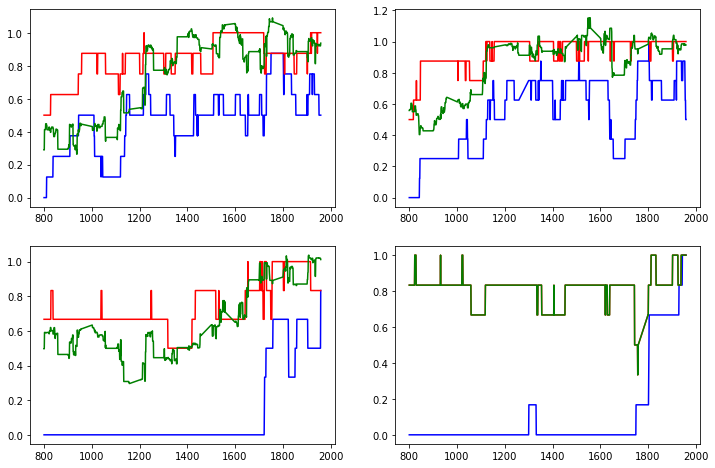

In [99]:
time = np.empty((12,60))



for i in range(12):
    time[i] = np.arange(800+i*100,800+i*100+60)
time = np.reshape(time, 720)
plt.figure(figsize=(12,8))
plt.subplot(2, 2, 1)
plt.plot(time, day_input[22][:720], color='b')
plt.plot(time, day_output[22], color='r')
plt.plot(time, pcr.predict(day_input[22:25])[0], color='g')
plt.subplot(2, 2, 2)
plt.plot(time, day_input[24][:720], color='b')
plt.plot(time, day_output[24], color='r')
plt.plot(time, pcr.predict(day_input[24:25])[0], color='g')
plt.subplot(2, 2, 3)
plt.plot(time, day_input[42][:720], color='b')
plt.plot(time, day_output[42], color='r')
plt.plot(time, pcr.predict(day_input[42:44])[0], color='g')
plt.subplot(2, 2, 4)
plt.plot(time, day_input[48][:720], color='b')
plt.plot(time, day_output[48], color='r')
plt.plot(time, pcr.predict(day_input[48:49])[0], color='g')

plt.show()